In [1]:
import tweepy
from tweepy import OAuthHandler
import pandas as pd
import json
import sys
import emoji
import numpy as np
import datetime
from collections import Counter
import matplotlib.pyplot as plt
from textblob import TextBlob
%matplotlib inline

In [6]:
analysis = TextBlob('wtfhahahahhahaha')
analysis.polarity

0.0

In [2]:
consumer_key = 'usR2qe5HtTX0eyDCRhQOufHTa'
consumer_secret = 'MQ7g4HISSRNP0Ib9H80Avv1BxlOqIjKB8CmqlRvKvs8c6JPhhH'
access_key = '798640585359982592-PivpURRxl6hL92t8cb02DIH8N2c1ax0'
access_secret = 'dqADIUXYWt3hgVWI1fjjTsA1wMGJ1uyEBRgaGGlnU9yy9'
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

In [18]:
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
 
class TwitterClient(object):
    '''
    Generic Twitter Class for sentiment analysis.
    '''
    def __init__(self):
        '''
        Class constructor or initialization method.
        '''
        # keys and tokens from the Twitter Dev Console
        consumer_key = 'usR2qe5HtTX0eyDCRhQOufHTa'
        consumer_secret = 'MQ7g4HISSRNP0Ib9H80Avv1BxlOqIjKB8CmqlRvKvs8c6JPhhH'
        access_token = '798640585359982592-PivpURRxl6hL92t8cb02DIH8N2c1ax0'
        access_token_secret = 'dqADIUXYWt3hgVWI1fjjTsA1wMGJ1uyEBRgaGGlnU9yy9'

        # attempt authentication
        try:
            # create OAuthHandler object
            self.auth = OAuthHandler(consumer_key, consumer_secret)
            # set access token and secret
            self.auth.set_access_token(access_token, access_token_secret)
            # create tweepy API object to fetch tweets
            self.api = tweepy.API(self.auth)
        except:
            print("Error: Authentication Failed")
 
    def clean_tweet(self, tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
 
    def get_tweet_sentiment(self, tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(self.clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
    

    
    def get_tweets(self, username):
        '''
        Main function to fetch tweets and parse them.
        '''
        # empty list to store parsed tweets
        tweets = []
 
        try:
            # call twitter api to fetch tweets
            for page in range(1,20):
                print(len(tweets))
                fetched_tweets = self.api.user_timeline(username, count = 500, page = page)
                             
 
            # parsing tweets one by one
                for tweet in fetched_tweets:
                    # empty dictionary to store required params of a tweet
                    parsed_tweet = {}

                    # saving text of tweet
                    parsed_tweet['text'] = tweet.text
                    # saving sentiment of tweet
                    parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)
                    
                    parsed_tweet['date'] = tweet.created_at
                    parsed_tweet['id'] = tweet.id
                    
                    parsed_tweet['polarity'] = TextBlob(self.clean_tweet(tweet.text)).sentiment.polarity
                    
                    # appending parsed tweet to tweets list
                    if tweet.retweet_count > 0:
                        # if tweet has retweets, ensure that it is appended only once
                        if parsed_tweet not in tweets:
                            tweets.append(parsed_tweet)
                    else:
                        tweets.append(parsed_tweet)
 
            # return parsed tweets
            return tweets
 
        except tweepy.TweepError as e:
            # print error (if any)
            print("Error : " + str(e))
 
def tweet_func(username):
    # creating object of TwitterClient Class
    api = TwitterClient()
    # calling function to get tweets
    tweets = api.get_tweets(username)
 
    # picking positive tweets from tweets
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    # percentage of positive tweets
    print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
    # picking negative tweets from tweets
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
    # percentage of negative tweets
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
    # percentage of neutral tweets
    print("Neutral tweets percentage: {} %".format((100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets))))
    
    # printing first 5 positive tweets
    print("\n\nPositive tweets:")
    for tweet in ptweets[:10]:
        print(tweet['text'])
 
    # printing first 5 negative tweets
    print("\n\nNegative tweets:")
    for tweet in ntweets[:10]:
        print(tweet['text'])
        
    return tweets
 

In [19]:
user1 = tweet_func('TyquanAssassin')

0
192
386
569
765
956
1148
1343
1536
1728
1923
2118
2313
2507
2703
2892
3089
3089
3089
Positive tweets percentage: 20.03884752347038 %
Negative tweets percentage: 17.675623179022338 %
Neutral tweets percentage: 62.28552929750728 %


Positive tweets:
It’s A Real Nigga Holiday 🗣 1:21 🕊 HBD K.I ‼️🎈❤️ #UnoTweet
RT @TyquanWorld_: It Ain't A Day That Go By In Ion Have Y'all Own My Mind Heavy 😔💔👼 @TyquanAssassin &amp; @Gotumadd_ 💯
RT @LilTony_062: @TyquanAssassin Did Wat Sum Niggas In Chiraq Was Scared To Do Shorty Was A Truu Hitta Nd A Real Nigga #RESPECT #RIPK.I.
I BET MY YOUNG NIGGAS THEY GONE MURDA...
I TAUGHT A COUPLE YOUNG NIGGAS HOW TO SHOOT SOME OLD GUNS B4 MY TIME WAS UP STL/EBT
RT @IAmMsParker_: It's My Shoota Birthday 🎈🎊🎉 Happy Birthday Trell 👼👼👼
RT @TBCOOKHISASS_: HAPPY GDAY BT #GANG #TRAPMONEY
Thinkin bout Da first time Lil tyquan got sum pussy my lil bro was happy asl 😔🙏
RT @__Shaylaa__: "@TyquanAssassin: u Nobody until Somebody kill u dats jst real Shyt 💯"
RT @reallifechink: @T

In [20]:
df_user1 = pd.DataFrame(user1)
df_user1

,date,id,polarity,sentiment,text
0,2018-04-06 03:10:57,982093271848583168,0.000000,neutral,My Boy #SuzyyTweet 🤙🏾 https://t.co/pEVbTwQlWq
1,2018-01-21 08:46:24,954998601645809664,0.000000,neutral,RT @TyquanAssassin: UNOs4Life 👑😤 @GKirahAssass...
2,2018-01-21 08:44:36,954998150682628097,0.000000,neutral,RT @FBG_DUCK: Rip @FREDOSANTANA300. Aint Never...
3,2018-01-21 08:44:26,954998107288363008,-0.100000,negative,RT @FBG_DUCK: &amp; Its Still FUCK DA OPPS 💯💯 ...
4,2018-01-21 08:43:54,954997972130988034,0.200000,positive,It’s A Real Nigga Holiday 🗣 1:21 🕊 HBD K.I ‼️🎈...
5,2016-11-22 03:19:51,800901580505706496,0.000000,neutral,UNOs4Life 👑😤 @GKirahAssassin Never Let Up Baby...
6,2016-04-07 14:34:44,718084600434597888,0.000000,neutral,RT @DOT_063: Wish You Was Still Here @TyquanAs...
7,2016-02-22 22:54:52,701903005965225985,0.000000,neutral,RT @TyquanWorld_: If You Was Here I Know You H...
8,2016-02-21 16:20:12,701441297115054080,0.000000,neutral,@GKirahAssassin We Numba Ones4Life 🙏🏾👭😤
9,2016-02-21 09:39:20,701340419687251968,-0.177778,negative,Uno I'll Foreva Hold Shit Down #UnoAmigaTweet 💍👭


In [17]:
df_user1.to_csv('polarity.csv')

In [6]:
df_user1['date1'] = [i.date() for i in df_user1.date]
df_user1_grouped = df_user1.groupby(df_user1.date1)

In [7]:
df_user1_polarity = df_user1_grouped.mean()

In [8]:
df_user1_polarity_2014 = df_user1_polarity[np.array([i.year == 2014 for i in df_user1_polarity.index])]


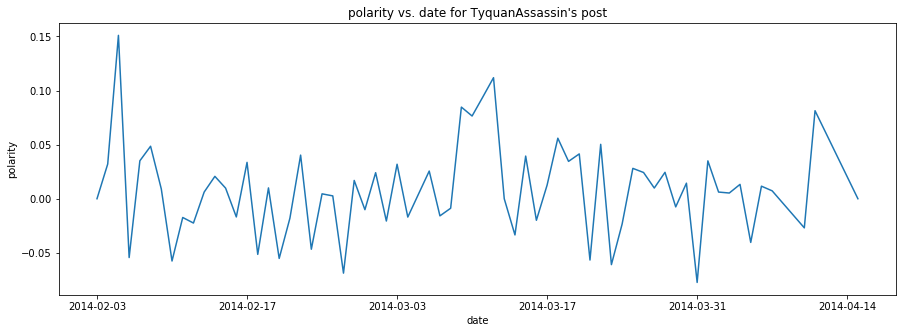

In [9]:
plt.figure(figsize=(15,5))
plt.plot(df_user1_polarity_2014[:67])
plt.ylabel('polarity')
plt.xlabel('date')
plt.title('polarity vs. date for TyquanAssassin\'s post')
plt.show()

In [16]:
df_user1[df_user1.polarity < -0.6]

,date,polarity,sentiment,text,date1
364,2014-03-28 10:34:04,-0.625000,negative,Thinking bout my 👶👧 @BandsOnAriee u probably M...,2014-03-28
372,2014-03-28 05:44:01,-0.625000,negative,@TV_TaTADDIC on folkz Nem u kno dey be on bull...,2014-03-28
380,2014-03-27 18:05:59,-0.625000,negative,Need 2 Get up Wit My Bitch I kno She Mad Asl 😼,2014-03-27
547,2014-03-24 03:26:09,-0.700000,negative,😂😺 My Bad baby girl,2014-03-24
671,2014-03-20 15:27:59,-0.700000,negative,@reallifechink My bad Lil homie Wassup Doe,2014-03-20
727,2014-03-20 08:31:33,-0.700000,negative,I Jst wanna Throw sum Bandz on a Bad Bitch on ...,2014-03-20
934,2014-03-16 19:47:03,-0.666667,negative,“@MGM_ChiefDayDay: The Worst Part About Life I...,2014-03-16
1014,2014-03-15 19:21:10,-0.750000,negative,u Cnt compare Da real 2 Da fake 💯,2014-03-15
1179,2014-03-08 16:19:47,-0.700000,negative,I Jst Got followed By a Bad Lil Bitch 😎,2014-03-08
1213,2014-03-07 19:10:56,-0.625000,negative,RT @YBNTell: Niggas Get Mad ERDAY Cause They B...,2014-03-07


In [93]:
user2 = tweet_func('QC_MrSwapItOut')

0
194
392
586
783
983
1183
1382
1579
1774
1972
2165
2361
2558
2750
2945
3144
3168
3168
Positive tweets percentage: 20.48611111111111 %
Negative tweets percentage: 14.61489898989899 %
Neutral tweets percentage: 64.8989898989899 %


Positive tweets:
I’m not No Rappin Ass nigga I’ll really get up Wit U 🗣💯
RT @lildurk: I’m HAPPY
U Only Get One Good Or Bad u Jus gotta Make Da Best Of It 🗣💯 @gherbo
RT @lildurk: No drama no stress I’m ready 🔥🔥🔥🔥
RT @lildurk: no negative energy all positive this way 💙
RT @Trefrmotb: Ofn @Poodafrm300_ @REALTHFTWIN  I felt Young Niggas like a mf 💯🤲🏽
RT @mixiemayaa: Me supporting whatever my bae does https://t.co/9zCPybh65B
RT @Thrashing_Jacob: Rt for good luck 🍀 https://t.co/4qrU6u38D1
RT @Mayberrykush: Lol herb snapped https://t.co/G9oZUFhSqC
RT @lildurk: I don’t trust easy


Negative tweets:
RT @survival_311: I hate internet beef 💯
RT @lildurk: I’ll risk my life for my bloodas no matter if it’s right or wrong
I Dun Put 2 Pills inside me Like dis Shit Ain’t Me 

In [94]:
df_user2 = pd.DataFrame(user2)
df_user2['date1'] = [i.date() for i in df_user2.date]
df_user2_grouped = df_user2.groupby(df_user2.date1)
df_user2_polarity = df_user2_grouped.mean()

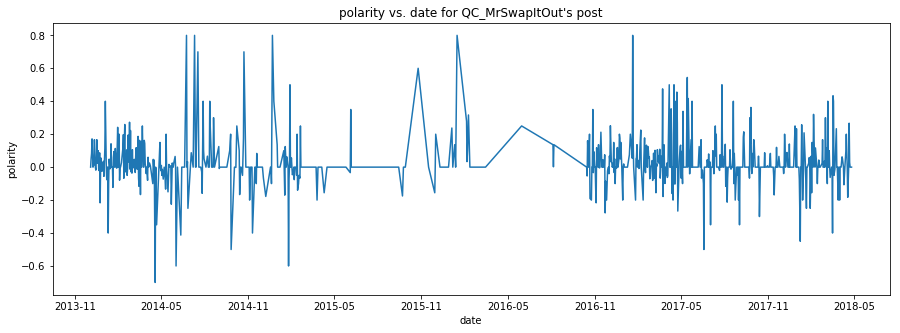

In [139]:
plt.figure(figsize=(15,5))
plt.plot(df_user2_polarity)

plt.ylabel('polarity')
plt.xlabel('date')
plt.title('polarity mean')
plt.title('polarity vs. date for QC_MrSwapItOut\'s post')

plt.show()


In [25]:
main('CashJayB')

0
200
398
597
796
991
1185
1385
1525
1525
1525
1525
1525
1525
1525
1525
1525
1525
1525
Positive tweets percentage: 19.60655737704918 %
Negative tweets percentage: 16.459016393442624 %
Neutral tweets percentage: 63.9344262295082 %


Positive tweets:
I be feelin like a straight zombie around dese hours😭
Doin good Dey can’t stop me
@CASHCODELSatcho 🎬I’m cumin lol
RT @CASHCODELSatcho: Ok little 6rother. https://t.co/TpvnTNcp3S
RT @GLOGangHQ: Happy Birthday Capo .. RIP 🙏 https://t.co/5Cdk0HHZSV
Finna Give Y’all Dat hot Shit!🤫 https://t.co/FsxWANlpFD
Fast Life✨
RT @eddiecreal03: Ain’t nothing new 🤷🏽‍♂️😈🏀 @RHSpartansBball https://t.co/2rr9UwYB8g
I’m good with or without ya😅
RT @Vic__ciV: I dont get high bitch i get.... https://t.co/K6qNjjaWX4


Negative tweets:
CashJayB - Gang Shit FreeStyle Ona Way🦇🔋 https://t.co/4uzIYCGUsQ
I ain’t tryna commit to shit but this guwop😘
RT @LilD1024: we ain fuckn round https://t.co/XNRQCZaR7T
Definitely can get they shit pushed back also https://t.co/H5gprFnjA

In [26]:
main('SMDotarachi')

0
200
400
599
799
994
1191
1389
1587
1784
1984
2183
2382
2493
2493
2493
2493
2493
2493
Positive tweets percentage: 30.806257521058964 %
Negative tweets percentage: 27.837946249498597 %
Neutral tweets percentage: 41.35579622944244 %


Positive tweets:
Like it's crazy I have to put my people I love on a shirt cause these streets got to them before success did
I push people away for my own safety 💯 gotta always be prepared for someone to switch up 💯
RT @Smuggz_: I just want me and the ppl around me to be successful in life. I don’t care about anything else
There's just some people I do not want back in my life . Stay blocked for good
Whoever I date next , I'm doing old fashion shit . We going on a date first.
I wanna be successful...that's all man
If Capricorns aren't the best at sex idk who is
I really gotta go shopping 😓 I switch my attire every year
RT @YourFavvBaddie: Shoutout to myself because I really go unappreciated and my efforts go overlooked, but I still have a good heart, even